# FACEBOOK ADS

#### For more information you can check the link below:
#### https://developers.facebook.com/docs/marketing-api/targeting-search/

In [1]:
!pip install facebook-business

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
# -*- coding: utf-8 -*-
__author__ = "Carolina Coimbra"

from facebook_business.adobjects.adaccount import AdAccount
from facebook_business.adobjects.adset import AdSet
from facebook_business.adobjects.targetingsearch import TargetingSearch
from facebook_business.api import FacebookAdsApi
from facebook_business.exceptions import FacebookError
from unicodedata import normalize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import pandas as pd
import time
import random

## FUNCTIONS TO MAKE REQUESTS

In [3]:
# Initialize the account

# PLEASE, UPDATE THE VERSION IF NECESSARY!
def get_ad_account(token, act_id, secret):

    if secret != '-':
        facebook_api = FacebookAdsApi.init(access_token=token, app_secret=secret, api_version='v16.0') #version
    else:
        facebook_api = FacebookAdsApi.init(access_token=token, api_version='v16.0') #version

    account = AdAccount('act_' + act_id)
    
    return facebook_api, account

In [4]:
# Return the audience for a specific target
def make_request(account, targeting_spec):
    api_params = {
        'targeting_spec': targeting_spec
    }
    
    reach_estimate = account.get_reach_estimate(params=api_params)
    number_l = reach_estimate[0]['users_lower_bound']
    number_u = reach_estimate[0]['users_upper_bound']
    return number_l, number_u

In [5]:
# Return the interest id
def get_interestID_from_text(api, text, limit=10):
    params = {
        'q': text,        
        'type': 'adinterest',
        'limit': limit,        
    }
    
    resp = TargetingSearch.search(params=params, api=api)
    return resp

In [6]:
# Return the location key
def get_location_element(api, element, location_type="country"):   
    params = {
        'q': element,
        'type': 'adgeolocation',
        'location_types': [location_type], #['city'] OR ['region'] OR ['country'] OR ['country_group']
    }
    
    responses = TargetingSearch.search(params=params, api=api)
    return responses

In [7]:
# Return a dictionary with the informations abount the interests
def test_interest_search(api, list_of_interests_to_search): 
    
    print("interest_id \t name \t audience_size \t type")
       
    interests_dict = dict()

    for interest in list_of_interests_to_search:
        search_result = get_interestID_from_text(api, interest)
         
        #search_result can include (from zero to limit=10) interests related to your search
        if search_result:
            element = search_result[0] # get first interest returned
            
            #Only if the name is exactly the same as you search!
            if interest.lower() == element["name"].lower():
                e_id = element["id"]
                e_name = interest
                e_audience_l = element["audience_size_lower_bound"]
                e_audience_u = element["audience_size_upper_bound"]
                
                #not all responses have a topic and category defined. 
                try:
                    e_type = element["topic"]
                except:
                    e_type = ""
                    
                #add interest information to the dictionary (key: interest name)
                interests_dict[e_name] = {"id": e_id, 
                                          "audience_lower": e_audience_l, 
                                          "audience_upper": e_audience_u, 
                                          "type": e_type}

                print (str(e_id), str(e_name), str(e_audience_l), str(e_audience_u), str(e_type))
          
    return interests_dict


In [8]:
# Return a dictionary with the informations abount the locations
def test_search_location_code(api, list_of_locations_and_types_to_search):
    
    print("key \t name \t location_type")
    
    locations_dict = dict()
    
    for location, l_type in list_of_locations_and_types_to_search:
        search_result = get_location_element(api, location, location_type = l_type)  
        
        #search_result can include (from zero to ?) locations related to your search
        if search_result:
            element = search_result[0] # get first interest returned

            #Only if the name is exactly the same as you search!
            if location == element["name"]:
                e_key = element["key"]
                e_name = element["name"]
                e_type = element["type"]

                locations_dict[e_name] = {"key": e_key, "type": e_type}

                print (str(e_key), str(e_name), str(e_type))
            
    return locations_dict

## INITIALIZE YOUR ACCOUNT

In [9]:
df = pd.read_csv("C:/Users/coimbravieira/token_fb.txt")

In [10]:
#COMPLETE YOUR TOKEN
token = "YOUR TOKEN HERE"
#COMPLETE YOUR APP ID
act_id = "YOUR APP ID HERE"
secret = "-"
  
facebook_api, account = get_ad_account(token, act_id, secret)

In [11]:
#COMPLETE YOUT TOKEN
token = str(df.iloc[3,1])
#COMPLETE YOUR APP ID
act_id = str(df.iloc[0,1])
secret = "-"
  
facebook_api, account = get_ad_account(token, act_id, secret)

## EXAMPLES:

### Collecting some interests id

In [12]:
list_of_interests_to_search = ['pet food', 'dog food', 'cat food', 
                               'organic food', 'fast food', 'veganism', 'vegetarianism',
                               'pretzel', 'barbecue', 'sausage', 'pizza', 'seafood',
                               'football', 'basketball', 'volleyball', 'cycling']

In [13]:
print("INTERESTS TO SEARCH:")
interests_dict = test_interest_search(facebook_api, list_of_interests_to_search)

INTERESTS TO SEARCH:
interest_id 	 name 	 audience_size 	 type
6003461162225 pet food 108416370 127497652 Business and industry
6003381100005 dog food 41496977 48800446 Food and drink
6003205281847 cat food 28571546 33600139 
6002868910910 organic food 273132221 321203492 Food and drink
6004037400009 fast food 445818967 524283106 Food and drink
6003641846820 veganism 324563265 381686400 Food and drink
6003155333705 vegetarianism 207809507 244383981 Food and drink
6003130694636 pretzel 6137568 7217780 Food and drink
6003435096731 barbecue 348044897 409300800 Food and drink
6002968797092 sausage 53667253 63112690 Food and drink
6003668857118 pizza 441634838 519362570 Food and drink
6003240742699 seafood 270206906 317763322 Food and drink
6003442346642 football 86429591 101641200 Sports and outdoors
6003369240775 basketball 714404481 840139670 Sports and outdoors
6002929380259 volleyball 342179787 402403430 Sports and outdoors
6003402532547 cycling 196664226 231277130 Fitness and wellness

In [14]:
interests = pd.DataFrame.from_dict(interests_dict, orient="index")
interests.to_csv("data/interests.csv")

### Collecting some locations key

In [15]:
#available location types: country, country_group, region, city
list_of_locations_to_search = [('Brazil', 'country'), 
                               ('Germany', 'country'), 
                               ('Italy', 'country')]

In [16]:
print("LOCATIONS TO SEARCH:")
locations_dict = test_search_location_code(facebook_api, list_of_locations_to_search)

LOCATIONS TO SEARCH:
key 	 name 	 location_type
BR Brazil country
DE Germany country
IT Italy country


### Defining your target
#### In this example we want all the Facebook users who are between 13 and 65+ years old.

For more information, see: https://developers.facebook.com/docs/marketing-api/audiences/reference

In [17]:
targeting_spec = {
    "publisher_platforms": ["facebook", "instagram"], #platform: facebook, instagram
    "facebook_positions": ["feed"], #where the ad would be displayed: feed, right_hand_column, instream_video
    #"genders": #,Defaults to all. 1 targets males, 2 targets females.
    "age_min": 13, #The min age default is 18, so I've changed to 13. The max age default is 65+
    #"age_max": #, #The max age default is 65+
    "excluded_publisher_categories": [],
    "excluded_publisher_list_ids": [],
    "user_device": [],
    "excluded_user_device": [],
    "user_os": [],
    "wireless_carrier": [],
    'behaviors': [],
    'interests': [],
    "flexible_spec": []        
}

### Collecting the audience in each country

In [18]:
for location in locations_dict:
    #Adding the information about the location of our target
    if locations_dict[location]["type"] == "country":
        targeting_spec["geo_locations"] = {"countries":[locations_dict[location]["key"]]}
    else:
        targeting_spec["geo_locations"] = {"regions":[{"key":locations_dict[location]["key"]}]}
    
    #We will not specify interests because we are interested on the country audience
    targeting_spec["interests"] = []
        
    audience_size_l, audience_size_u = make_request(account,targeting_spec)
    
    print ("Population in ", location, ":", str(audience_size_l), "-", str(audience_size_u))
    
    locations_dict[location]["audience_lower"] = audience_size_l
    locations_dict[location]["audience_upper"] = audience_size_u

Population in  Brazil : 143700000 - 169100000
Population in  Germany : 40100000 - 47200000
Population in  Italy : 37900000 - 44600000


In [19]:
locations_dict

{'Brazil': {'key': 'BR',
  'type': 'country',
  'audience_lower': 143700000,
  'audience_upper': 169100000},
 'Germany': {'key': 'DE',
  'type': 'country',
  'audience_lower': 40100000,
  'audience_upper': 47200000},
 'Italy': {'key': 'IT',
  'type': 'country',
  'audience_lower': 37900000,
  'audience_upper': 44600000}}

In [20]:
locations = pd.DataFrame.from_dict(locations_dict, orient="index")
locations.to_csv("data/locations.csv")

### Collecting the audience in each interests for each country

https://developers.facebook.com/docs/graph-api/overview/rate-limiting

In [21]:
dict_info = dict()

for location in locations_dict:
    
    dict_info[location] = dict()
    
    #Adding the information about the location of our target
    if locations_dict[location]["type"] == "country":
        targeting_spec["geo_locations"] = {"countries":[locations_dict[location]["key"]]}
    else:
        targeting_spec["geo_locations"] = {"regions":[{"key":locations_dict[location]["key"]}]}

    for interest in interests_dict:
        #Adding the information about the interest we are looking for
        targeting_spec["interests"] = [interests_dict[interest]["id"]]

        try:
            audience_size_l, audience_size_u = make_request(account,targeting_spec)
            
        except:
            #Wait for 3600s for next request
            time.sleep(3600)
            
            try:
                audience_size_l, audience_size_u = make_request(account,targeting_spec)
                
            except:
                audience_size_l = 0
                audience_size_u = 0
                print("Error!", location, interest)
            
        finally:
            print ("Population in " + str(location) + " interested in " + str(interest) + " = " + str(audience_size_l), str(audience_size_u))
            dict_info[location][interest] = {"audience_lower": audience_size_l, 
                                             "%audience_lower_country": float(audience_size_l/float(locations_dict[location]["audience_lower"])),
                                             "audience_upper": audience_size_u, 
                                             "%audience_upper_country": float(audience_size_u/float(locations_dict[location]["audience_upper"]))}
            #Wait from 1 to 10 seconds between requests
            time.sleep(random.randint(1, 10))

Population in Brazil interested in pet food = 25200000 29600000
Population in Brazil interested in dog food = 16600000 19600000
Population in Brazil interested in cat food = 13400000 15800000
Population in Brazil interested in organic food = 23300000 27500000
Population in Brazil interested in fast food = 31600000 37200000
Population in Brazil interested in veganism = 31300000 36800000
Population in Brazil interested in vegetarianism = 23200000 27300000
Population in Brazil interested in pretzel = 257900 303400
Population in Brazil interested in barbecue = 26900000 31600000
Population in Brazil interested in sausage = 5600000 6600000
Population in Brazil interested in pizza = 10800000 12700000
Population in Brazil interested in seafood = 15700000 18500000
Population in Brazil interested in football = 47700000 56100000
Population in Brazil interested in basketball = 62600000 73600000
Population in Brazil interested in volleyball = 36800000 43300000
Population in Brazil interested in cyc

In [22]:
reformed_dict = {}
for outer_key, inner_dict in dict_info.items():
    for inner_key, values in inner_dict.items():
        reformed_dict[(outer_key, inner_key)] = values

# Display multiindex dataframe
df = pd.DataFrame(reformed_dict).T
df

audience_lower  %audience_lower_country  \
Brazil  pet food           25200000.0                 0.175365   
        dog food           16600000.0                 0.115518   
        cat food           13400000.0                 0.093250   
        organic food       23300000.0                 0.162143   
        fast food          31600000.0                 0.219903   
        veganism           31300000.0                 0.217815   
        vegetarianism      23200000.0                 0.161447   
        pretzel              257900.0                 0.001795   
        barbecue           26900000.0                 0.187196   
        sausage             5600000.0                 0.038970   
        pizza              10800000.0                 0.075157   
        seafood            15700000.0                 0.109255   
        football           47700000.0                 0.331942   
        basketball         62600000.0                 0.435630   
        volleyball         36800000.0                 0.256089   
        cycling            18500000.0                 0.128740   
Germany pet food           11600000.0                 0.289277   
        dog food           10700000.0                 0.266833   
        cat food            8900000.0                 0.221945   
        organic food        5000000.0                 0.124688   
        fast food           3600000.0                 0.089776   
        veganism           15500000.0                 0.386534   
        vegetarianism      11200000.0                 0.279302   
        pretzel              266000.0                 0.006633   
        barbecue            4100000.0                 0.102244   
        sausage             1900000.0                 0.047382   
        pizza               1600000.0                 0.039900   
        seafood             2800000.0                 0.069825   
        football            5900000.0                 0.147132   
        basketball          6300000.0                 0.157107   
        volleyball          7500000.0                 0.187032   
        cycling            17900000.0                 0.446384   
Italy   pet food            9400000.0                 0.248021   
        dog food            7400000.0                 0.195251   
        cat food            6600000.0                 0.174142   
        organic food        9400000.0                 0.248021   
        fast food           7800000.0                 0.205805   
        veganism           12800000.0                 0.337731   
        vegetarianism      10000000.0                 0.263852   
        pretzel               99900.0                 0.002636   
        barbecue            6200000.0                 0.163588   
        sausage             2300000.0                 0.060686   
        pizza               3800000.0                 0.100264   
        seafood             4800000.0                 0.126649   
        football           10300000.0                 0.271768   
        basketball         10800000.0                 0.284960   
        volleyball          9000000.0                 0.237467   
        cycling            15900000.0                 0.419525   

                       audience_upper  %audience_upper_country  
Brazil  pet food           29600000.0                 0.175044  
        dog food           19600000.0                 0.115908  
        cat food           15800000.0                 0.093436  
        organic food       27500000.0                 0.162626  
        fast food          37200000.0                 0.219988  
        veganism           36800000.0                 0.217623  
        vegetarianism      27300000.0                 0.161443  
        pretzel              303400.0                 0.001794  
        barbecue           31600000.0                 0.186872  
        sausage             6600000.0                 0.039030  
        pizza              12700000.0                 0.075103  
        

In [25]:
df.to_csv("data/toy-example.csv")

In [3]:
df = pd.read_csv("data/toy-example.csv", index_col=[0,1])
df

audience_lower  %audience_lower_country  \
Brazil  pet food           25200000.0                 0.175365   
        dog food           16600000.0                 0.115518   
        cat food           13400000.0                 0.093250   
        organic food       23300000.0                 0.162143   
        fast food          31600000.0                 0.219903   
        veganism           31300000.0                 0.217815   
        vegetarianism      23200000.0                 0.161447   
        pretzel              257900.0                 0.001795   
        barbecue           26900000.0                 0.187196   
        sausage             5600000.0                 0.038970   
        pizza              10800000.0                 0.075157   
        seafood            15700000.0                 0.109255   
        football           47700000.0                 0.331942   
        basketball         62600000.0                 0.435630   
        volleyball         36800000.0                 0.256089   
        cycling            18500000.0                 0.128740   
Germany pet food           11600000.0                 0.289277   
        dog food           10700000.0                 0.266833   
        cat food            8900000.0                 0.221945   
        organic food        5000000.0                 0.124688   
        fast food           3600000.0                 0.089776   
        veganism           15500000.0                 0.386534   
        vegetarianism      11200000.0                 0.279302   
        pretzel              266000.0                 0.006633   
        barbecue            4100000.0                 0.102244   
        sausage             1900000.0                 0.047382   
        pizza               1600000.0                 0.039900   
        seafood             2800000.0                 0.069825   
        football            5900000.0                 0.147132   
        basketball          6300000.0                 0.157107   
        volleyball          7500000.0                 0.187032   
        cycling            17900000.0                 0.446384   
Italy   pet food            9400000.0                 0.248021   
        dog food            7400000.0                 0.195251   
        cat food            6600000.0                 0.174142   
        organic food        9400000.0                 0.248021   
        fast food           7800000.0                 0.205805   
        veganism           12800000.0                 0.337731   
        vegetarianism      10000000.0                 0.263852   
        pretzel               99900.0                 0.002636   
        barbecue            6200000.0                 0.163588   
        sausage             2300000.0                 0.060686   
        pizza               3800000.0                 0.100264   
        seafood             4800000.0                 0.126649   
        football           10300000.0                 0.271768   
        basketball         10800000.0                 0.284960   
        volleyball          9000000.0                 0.237467   
        cycling            15900000.0                 0.419525   

                       audience_upper  %audience_upper_country  
Brazil  pet food           29600000.0                 0.175044  
        dog food           19600000.0                 0.115908  
        cat food           15800000.0                 0.093436  
        organic food       27500000.0                 0.162626  
        fast food          37200000.0                 0.219988  
        veganism           36800000.0                 0.217623  
        vegetarianism      27300000.0                 0.161443  
        pretzel              303400.0                 0.001794  
        barbecue           31600000.0                 0.186872  
        sausage             6600000.0                 0.039030  
        pizza              12700000.0                 0.075103  
        

### Plots

In [4]:
def plot_audience(location, df, norm=False, interests_list=None):
    
    df = df.loc[location] #dataframe for one location only
    
    if interests_list:
        df = df.loc[interests_list] #dataframe only for a set of interests
        
    df["audience_upper"] = df["audience_upper"]-df["audience_lower"]
    df["%audience_upper_country"] = df["%audience_upper_country"]-df["%audience_lower_country"]
    
    if norm:
        df[["%audience_lower_country", "%audience_upper_country"]].plot.barh(stacked=True)
    else:
        df[["audience_lower", "audience_upper"]].plot.barh(stacked=True)
        
    plt.title(location)
    plt.xlabel("audience")
    plt.ylabel("interests")
    
    plt.show()

Italy


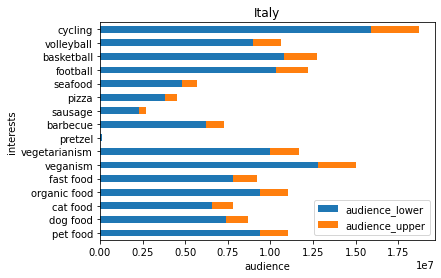

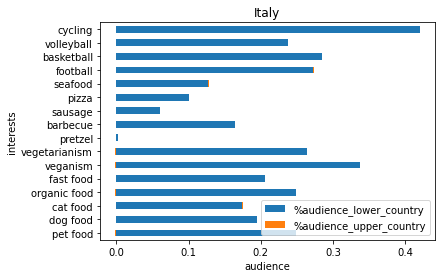

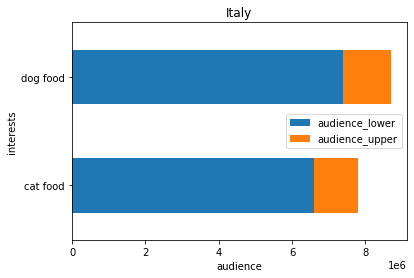

Brazil


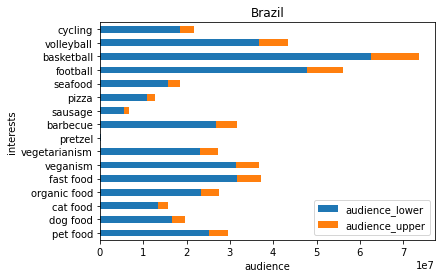

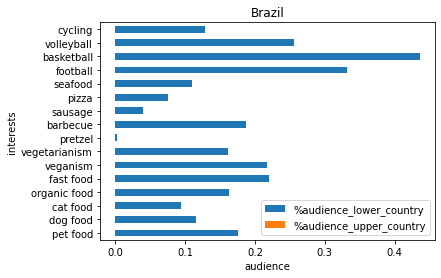

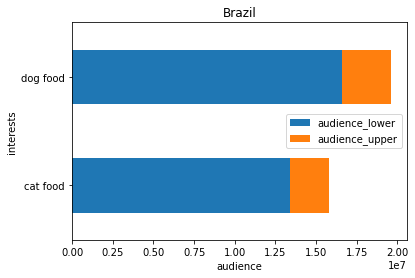

Germany


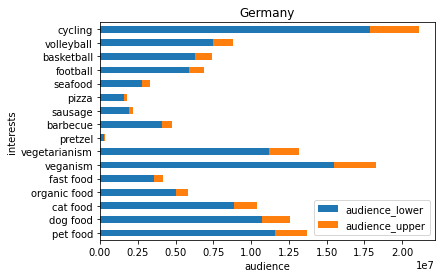

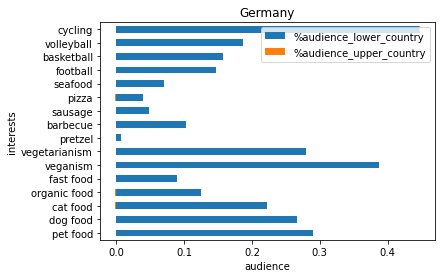

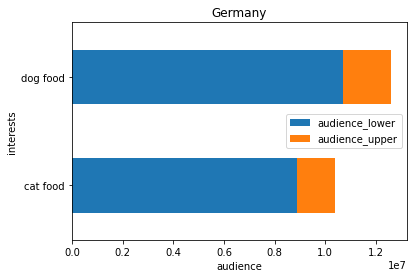

In [5]:
for location in set(df.index.get_level_values(level=0)):
    print(location)
    plot_audience(location, df)
    plot_audience(location, df, norm=True)
    
    plot_audience(location, df, interests_list=["cat food", "dog food"])
    

#### Things to be aware of:
Audience lower-bound: 1,000  

Sometimes it's helpeful to normalize: %location, %interest, z-score, etc.